In [1]:
import os
import time
import pandas as pd
import urllib.request
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# change matplotlib settings to make plots look nicer
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['xtick.minor.width'] = 3
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['ytick.minor.width'] = 3
plt.rcParams['ytick.major.width'] = 3

def plot_setup(labels=['X', 'Y'], fsize=18, title='',
               axes_on=True):
    """Creates a custom plot configuration to make graphs look nice.
    This should be called between plt.plot() and plt.show() commands."""
    plt.xlabel(str(labels[0]), fontsize=fsize)
    plt.ylabel(str(labels[1]), fontsize=fsize)
    plt.axis(axes_on)
    plt.title(title, fontsize=fsize)
    #fig = plt.gcf()
    #fig.set_size_inches(8, 8)

In [2]:
# create a query topic
query = 'additive'

# create API URL to request
url_start = r'http://export.arxiv.org/api/query?search_query=all'
url_end = r':{}&start=0&max_results=10000'.format(query)
url = url_start + url_end

# get response from URL, decode it, and remove new line characters
response = urllib.request.urlopen(url).read()
response = response.decode().replace('\n', '')

# create the HTML parser
soup = BeautifulSoup(response, 'html.parser')
#print(soup.prettify())

# extract publication information from HTML
titles = [i.get_text() for i in soup.find_all('title')][1:]
summaries = [i.get_text().lstrip() for i in soup.find_all('summary')]
years = [int(i.get_text().split('-')[0]) for i in soup.find_all('published')]
print('Found {} acticles using "{}" query'.format(len(titles), query))

Found 10000 acticles using "additive" query


In [3]:
df = pd.DataFrame()
df['title'] = titles
df['year'] = years
df['summary'] = summaries

df

,title,year,summary
0,On additive property of finitely additive meas...,2019,"By the additive property, we mean a condition ..."
1,Additive Lie ($ξ$-Lie) Derivations and General...,2010,The additive (generalized) $\xi$-Lie derivatio...
2,Every null additive set of reals is meager add...,1994,We show that every null-additive set is meager...
3,On the equivalence of some eternal additive co...,2006,"In this paper, we study additive coalescents. ..."
4,The additive dilogarithm,2002,We define an additive version of the Bloch gro...
...,...,...,...
9995,Updating the silent speech challenge benchmark...,2017,The 2010 Silent Speech Challenge benchmark is ...
9996,Heteroscedastic BART Using Multiplicative Regr...,2017,BART (Bayesian Additive Regression Trees) has ...
9997,Van der Waals torque and force between anisotr...,2017,We investigate the character of the van der Wa...
9998,On predictive density estimation with addition...,2017,Based on independently distributed $X_1 \sim N...


In [4]:
# save dataframe to file
export_time = time.strftime('%Y-%m-%d_%H-%M')
export_filepath = os.path.join(
    os.getcwd(), query+'__arxiv_query_'+export_time+'.txt')
df.to_csv(export_filepath, index=False, sep='\t')

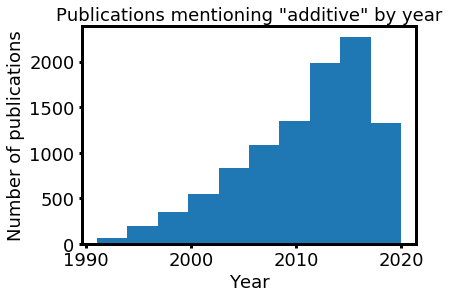

In [5]:
df.hist(column='year')
plt.grid(False)
plot_setup(title='Publications mentioning "{}" by year'.format(query),
          labels=['Year', 'Number of publications'])
plt.show()

In [23]:
'''
import scipy.io
import scipy.sparse
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.sparse.linalg import cg

#Load mat files from Finnish Inverse Problems society webpage (carved cheese dataset)
#data = scipy.io.loadmat('DataFull_512x15.mat')
data = {
    'A': np.random.random((20, 20)),
    'm': np.random.random((20, 20))}


A = data['A']
m = data['m']

b = m.flatten()

lam=10

A_T = A.transpose()

N = int(math.sqrt(np.shape(A)[1]))

x_a=scipy.sparse.linalg.lsmr(A,b, damp=lam**2)[0]
x_a = x_a.reshape((N,N))


x=scipy.sparse.linalg.lsqr(A, b, damp=lam**2)[0]
x = x.reshape((N,N))


#Plot using LSMR
plt.imshow(x_a,cmap = 'gray', interpolation='nearest')
plt.show()
#Plot using LSQR
plt.imshow(x,cmap = 'gray', interpolation='nearest')
plt.show()
'''

ValueError: dimension mismatch